In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Checking shapes to confirm loading successfull
print(f"Matches dataset shape: {matches.shape}")
print(f"Deliveries dataset shape: {deliveries.shape}")





Matches dataset shape: (636, 18)
Deliveries dataset shape: (136598, 21)


In [8]:
# Showing first 5 rows of matches
matches.head()




,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
# Show first 5 rows of deliveries
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


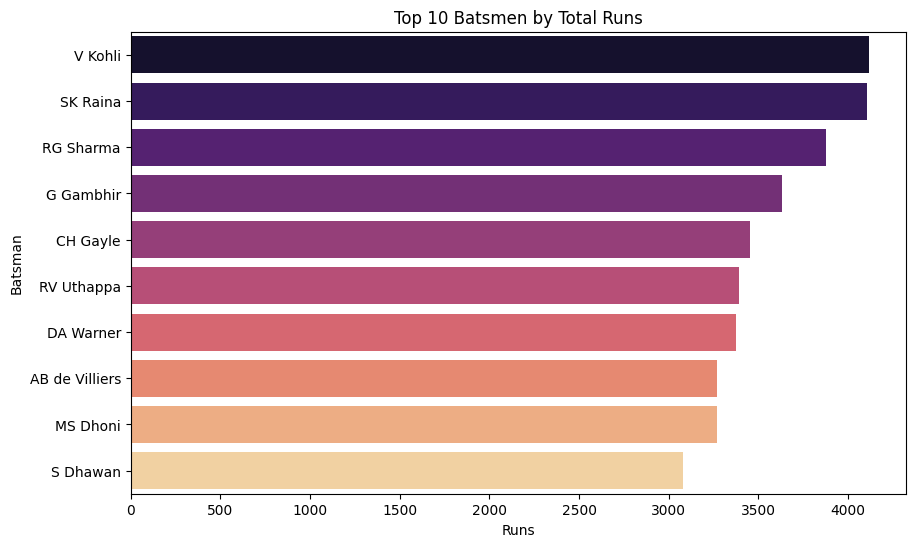

In [17]:
# Top 10 Batsmen by Total Runs
# Grouping by batsman and sum runs
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
# sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma', hue=top_batsmen.index, legend=False)

plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

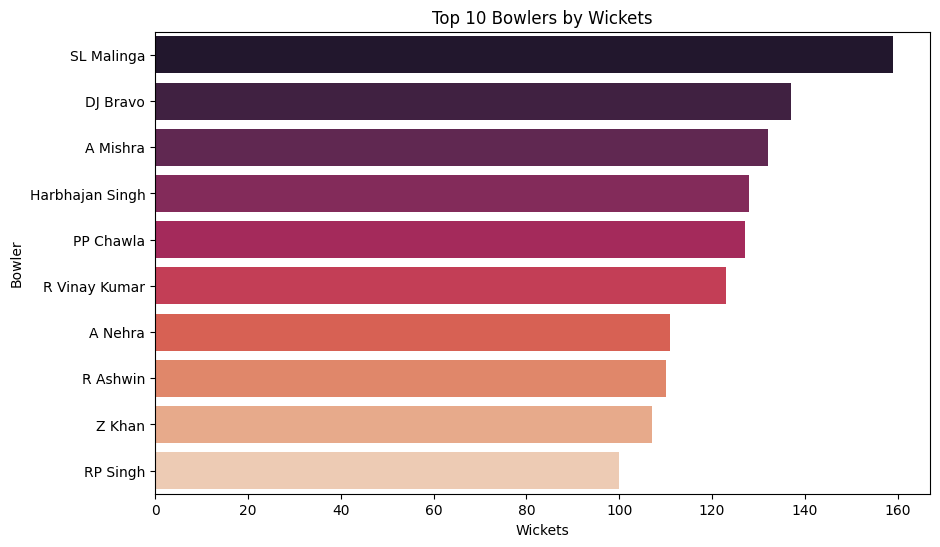

In [21]:
# Top 10 Bowlers by Wickets Taken
# Filtering deliveries where wicket fell-out
wickets = deliveries[deliveries['dismissal_kind'].notnull()]

# Count wickets per bowler
top_bowlers = wickets['bowler'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='rocket',hue=top_bowlers.index, legend=False)
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

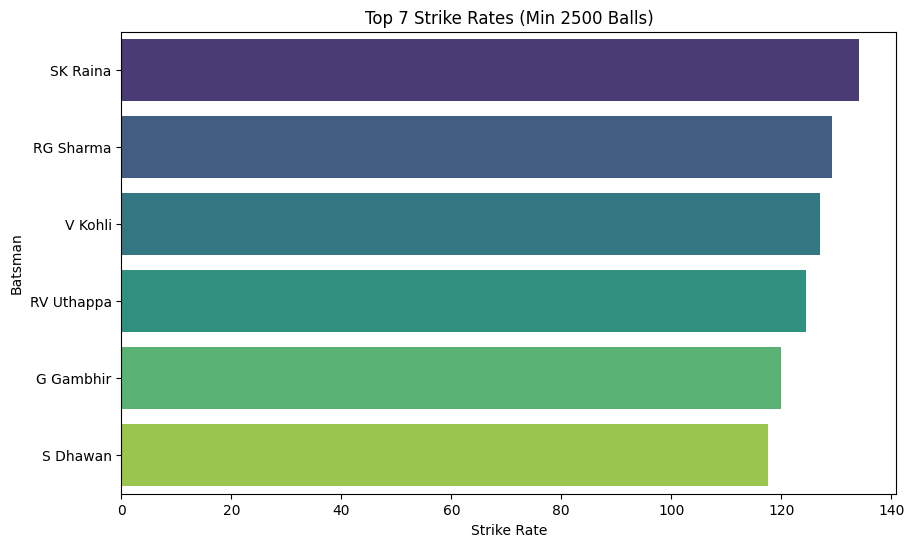

In [56]:
# Best Strike Rates (Min 2500 Balls Faced)
# Calculate balls faced per batsman
balls_faced = deliveries.groupby('batsman').count()['ball']

# Total runs by batsman
runs = deliveries.groupby('batsman').sum()['batsman_runs']

# Calculate strike rate
strike_rate = (runs / balls_faced) * 100

# Filter batsmen with at least 2500 balls
qualified = strike_rate[balls_faced > 2500 ].sort_values(ascending=False).head(7)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=qualified.values, y=qualified.index, palette='viridis',hue=qualified.index, legend=False)
plt.title('Top 7 Strike Rates (Min 2500 Balls)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()


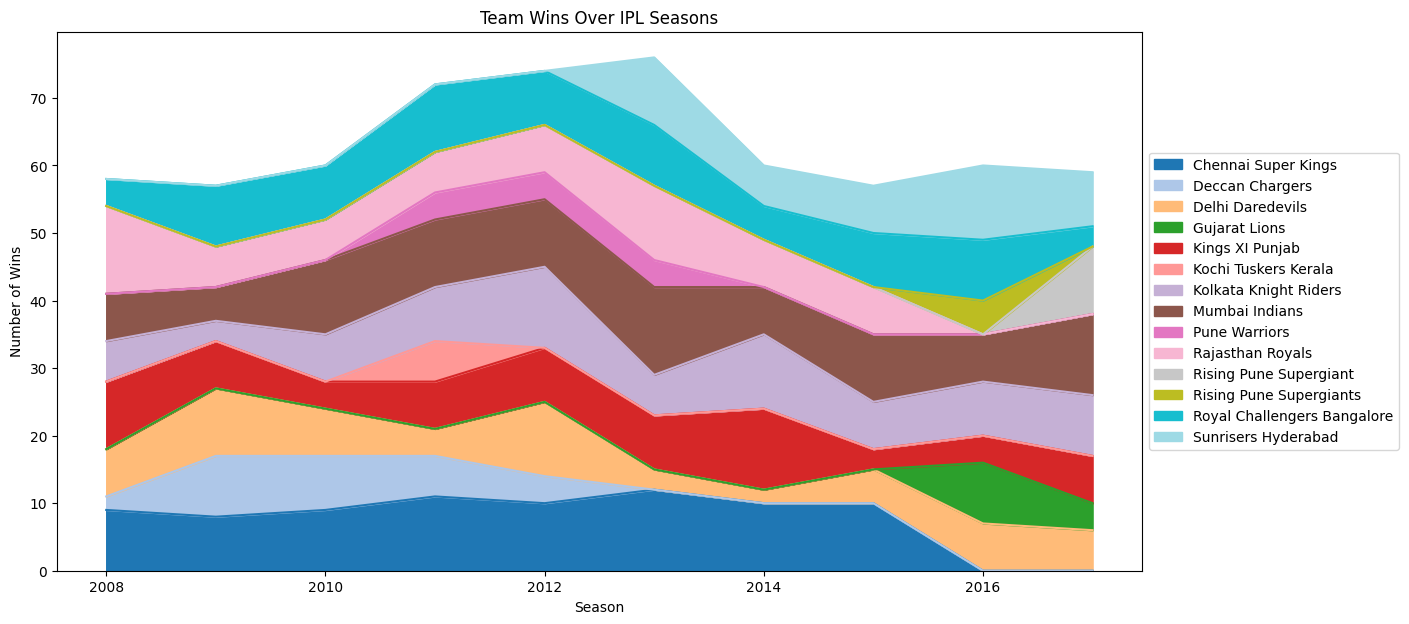

In [64]:
# Team Performance Over Seasons (Wins per Year)
# Group matches by season and winner
team_wins = matches.groupby(['season', 'winner']).size().unstack(fill_value=0)

# Plot stacked area chart
team_wins.plot(kind='area', stacked=True, figsize=(14,7), cmap='tab20')
plt.title('Team Wins Over IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

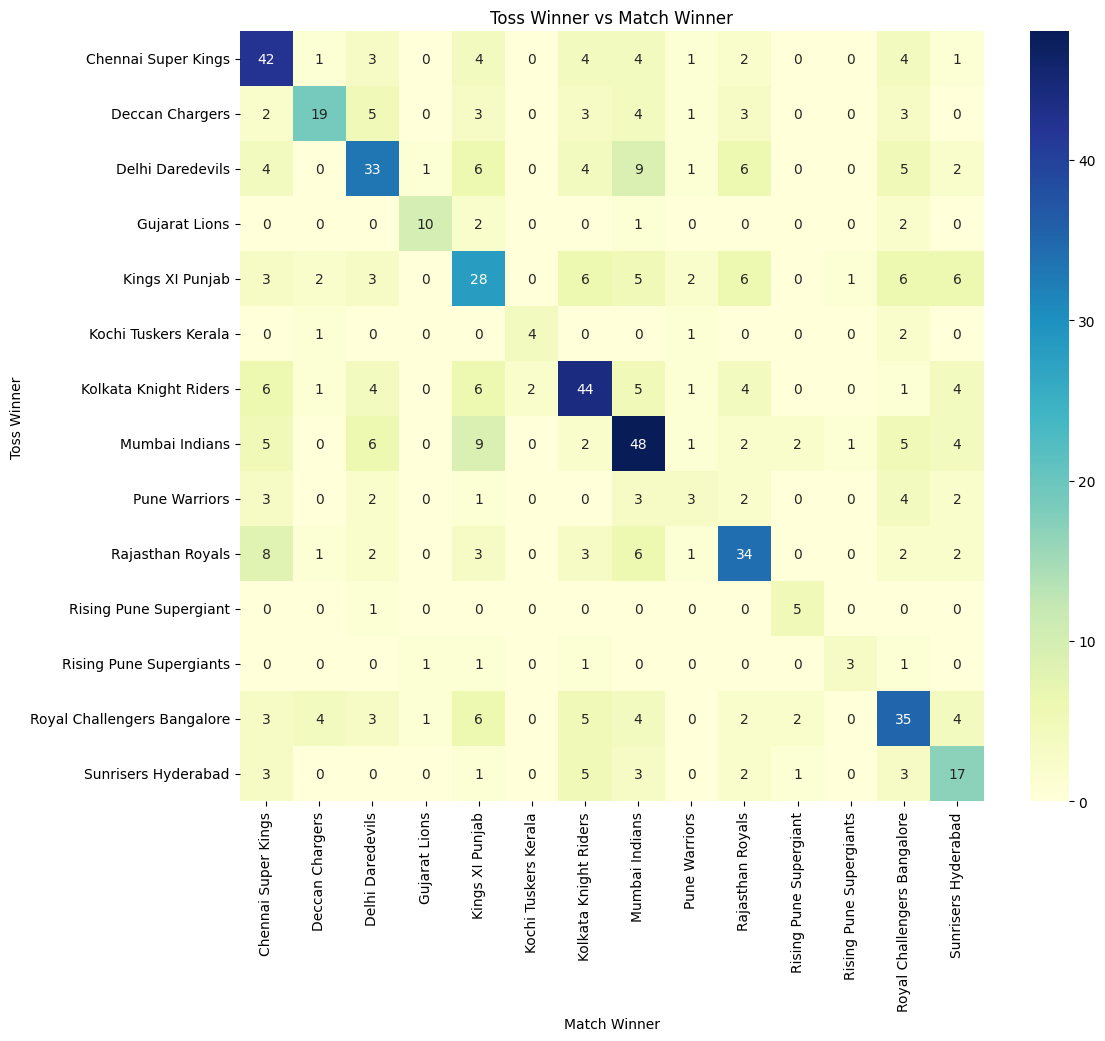

In [65]:
# Toss Decision Impact (Toss Winner vs Match Winner)
# Create crosstab of toss winner and match winner
toss_match = pd.crosstab(matches['toss_winner'], matches['winner'])

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(toss_match, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.show()